<a href="https://colab.research.google.com/github/bo-han05/Drafting-For-Dollars/blob/main/SDS_336_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import linear_model

# Read in datasets
drive.mount('/content/drive')
matches = pd.read_csv("/content/drive/MyDrive/Classes + Research/Junior 2025-26/SDS 336/Matches.csv")
elo = pd.read_csv("/content/drive/MyDrive/Classes + Research/Junior 2025-26/SDS 336/EloRatings.csv")

Mounted at /content/drive


/tmp/ipython-input-2604579324.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  matches = pd.read_csv("/content/drive/MyDrive/Classes + Research/Junior 2025-26/SDS 336/Matches.csv")


In [3]:
matches.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("\n--- Summary Statistics ---")
print(matches.describe(include="all"))


--- Summary Statistics ---
       Division   MatchDate MatchTime HomeTeam  AwayTeam        HomeElo  \
count    230557      230557     99072   230557    230557  141597.000000   
unique       38        7402       195     1214      1206            NaN   
top          E1  2014-10-18  15:00:00  Preston  Millwall            NaN   
freq      13606         175     14734      568       566            NaN   
mean        NaN         NaN       NaN      NaN       NaN    1533.118663   
std         NaN         NaN       NaN      NaN       NaN     153.279601   
min         NaN         NaN       NaN      NaN       NaN    1103.130000   
25%         NaN         NaN       NaN      NaN       NaN    1424.870000   
50%         NaN         NaN       NaN      NaN       NaN    1515.450000   
75%         NaN         NaN       NaN      NaN       NaN    1634.240000   
max         NaN         NaN       NaN      NaN       NaN    2107.480000   

              AwayElo      Form3Home      Form5Home      Form3Away  ...

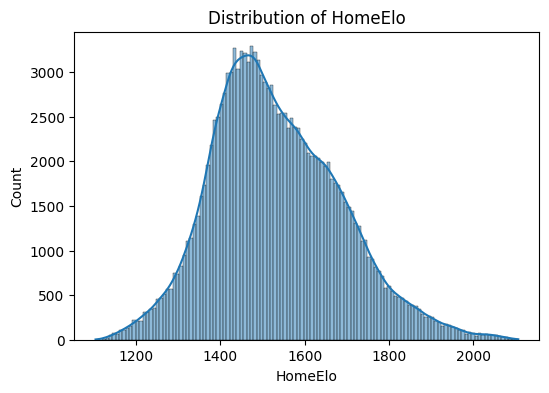

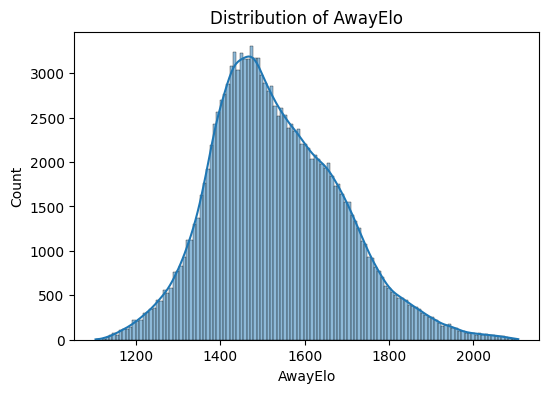

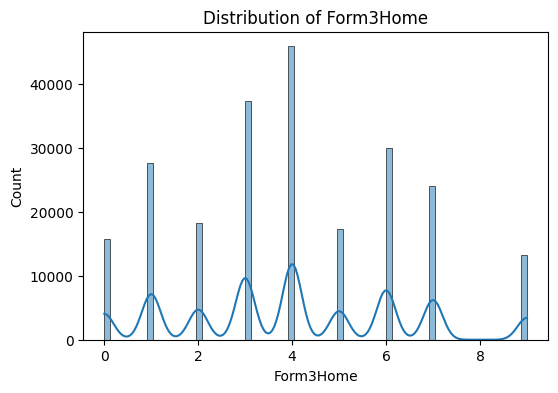

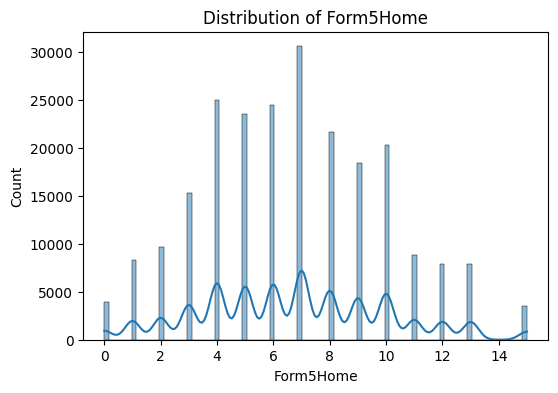

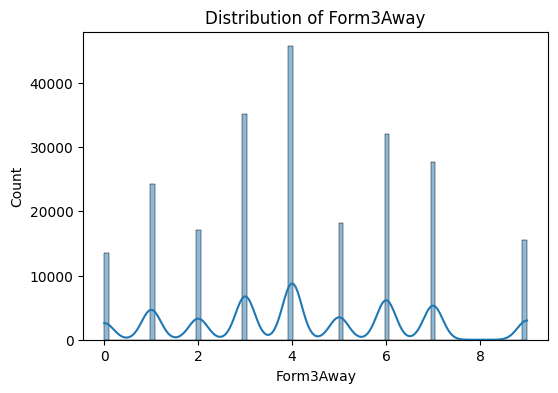

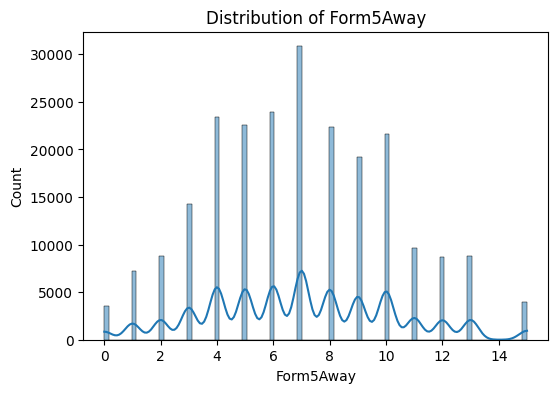

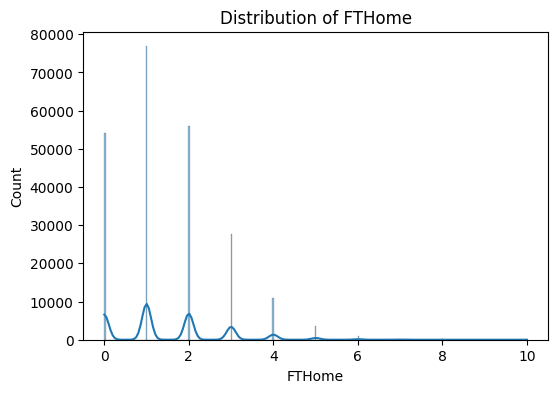

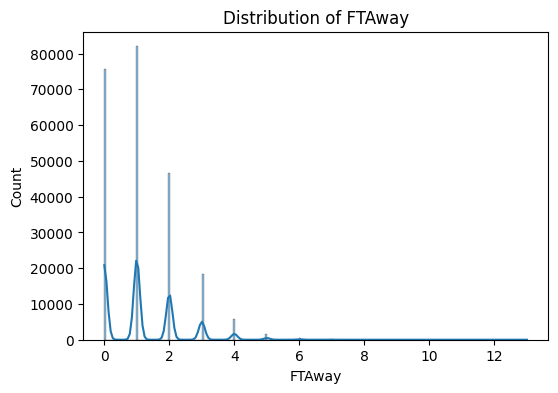

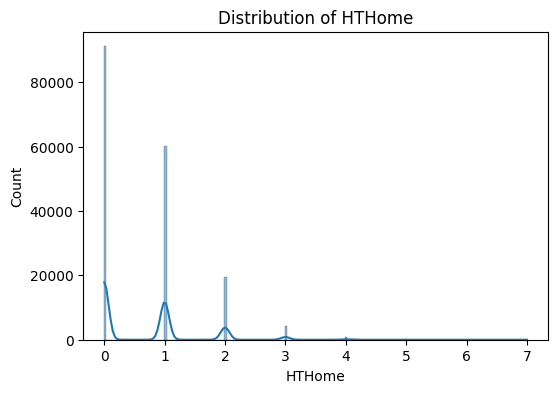

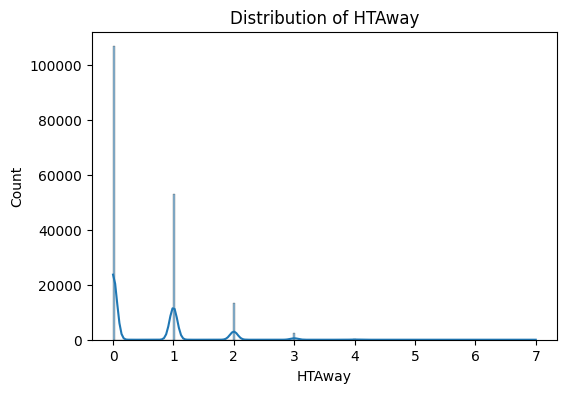

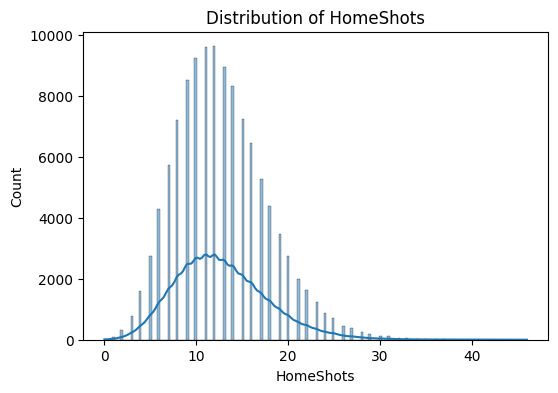

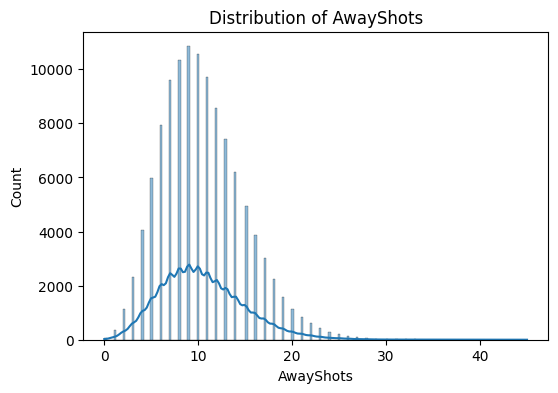

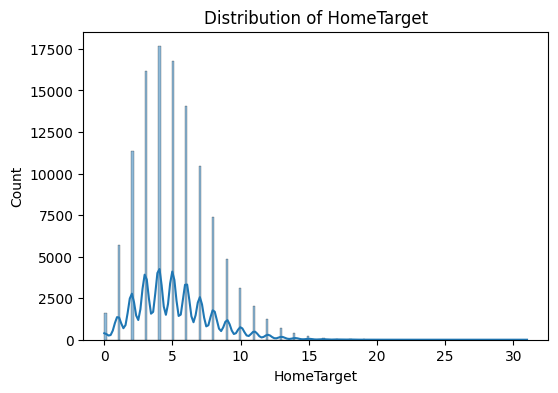

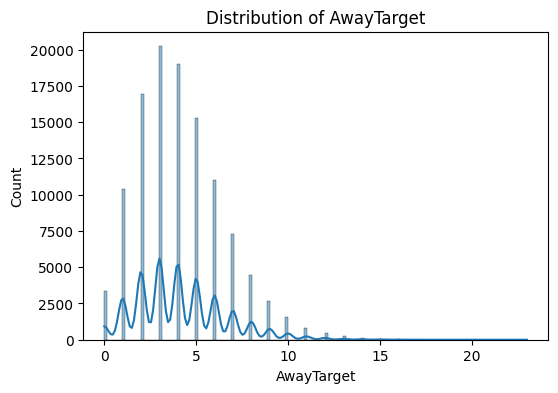

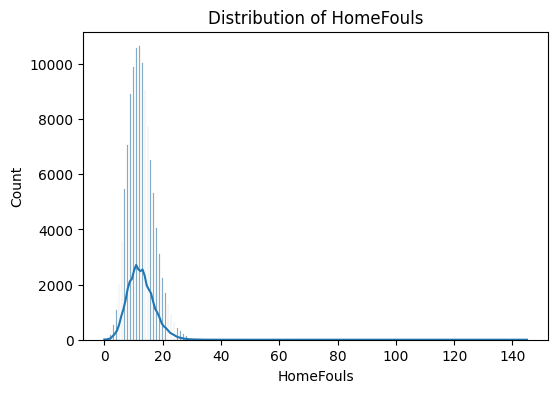

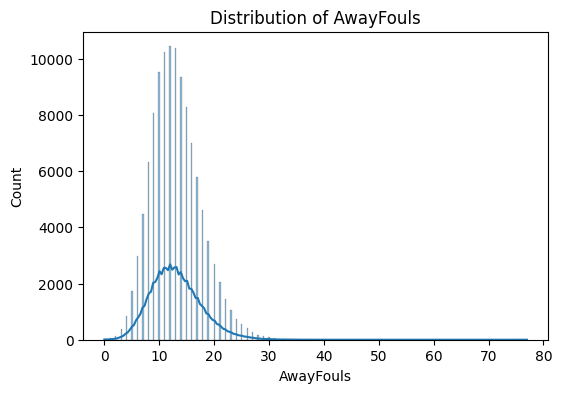

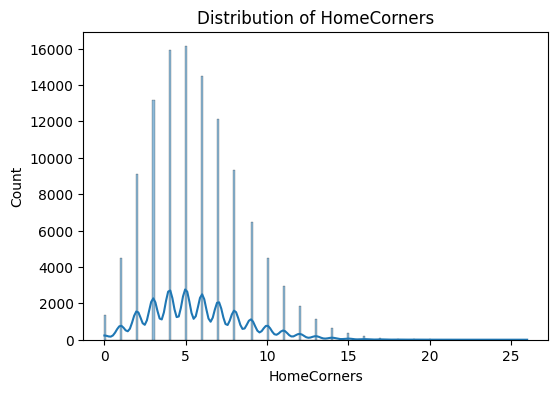

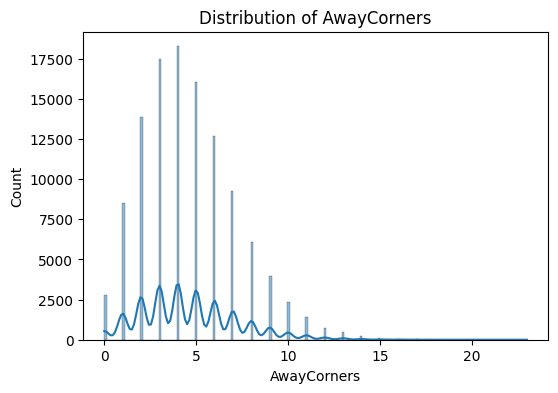

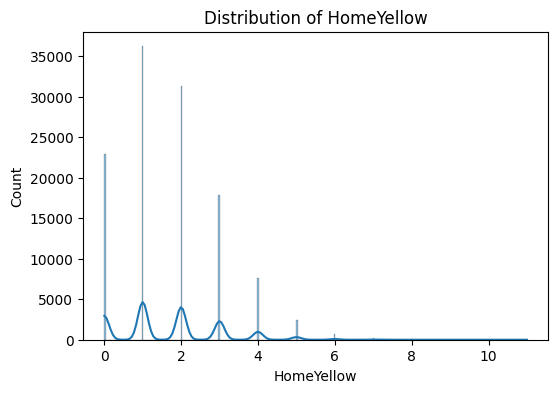

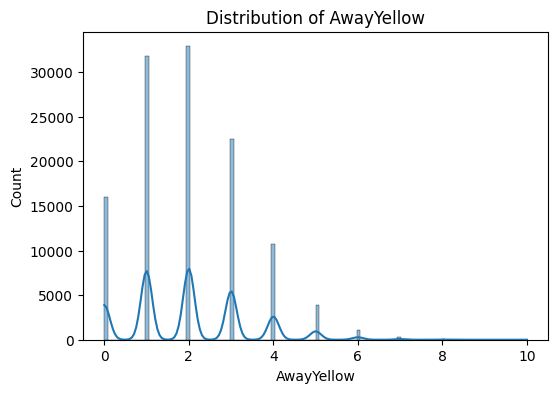

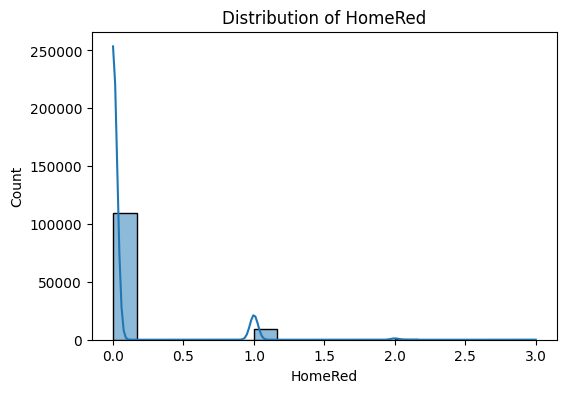

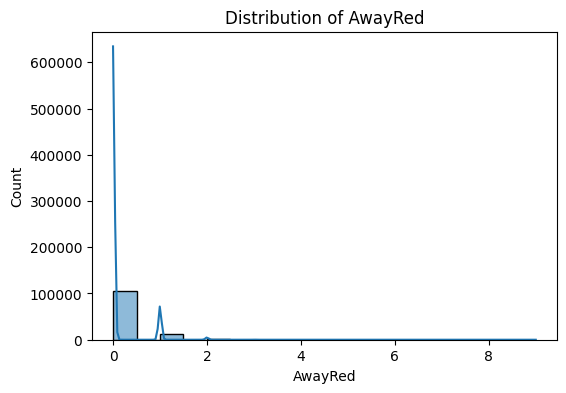

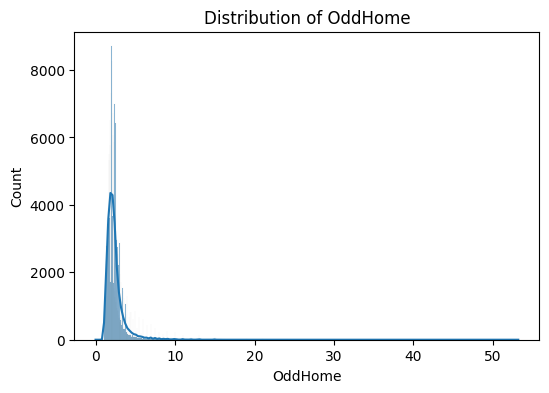

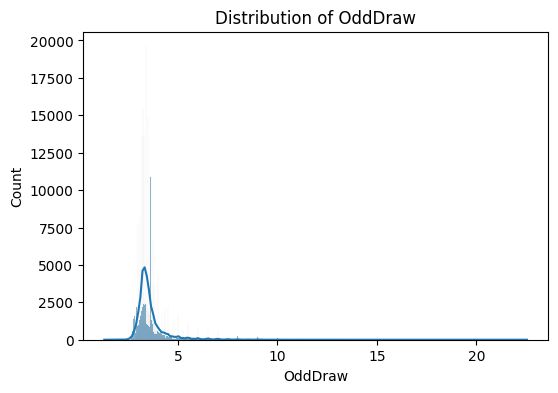

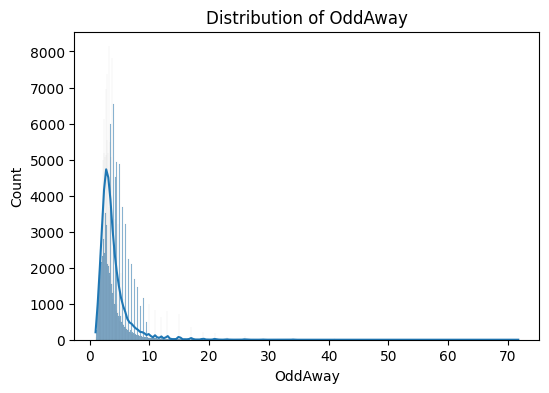

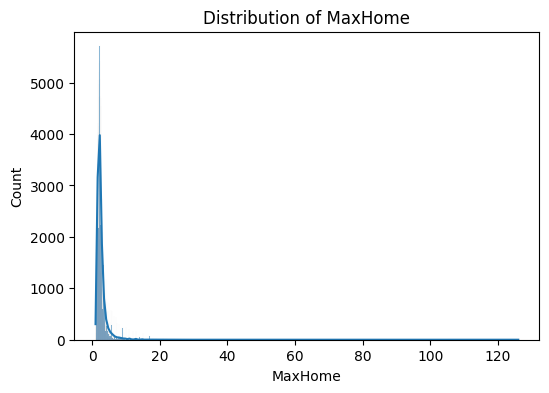

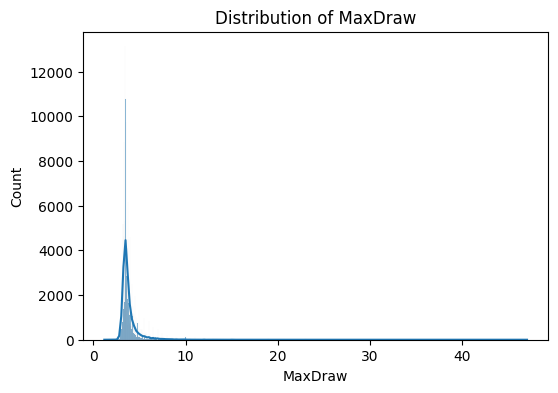

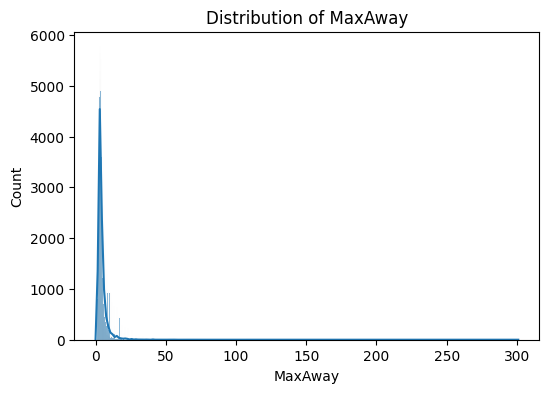

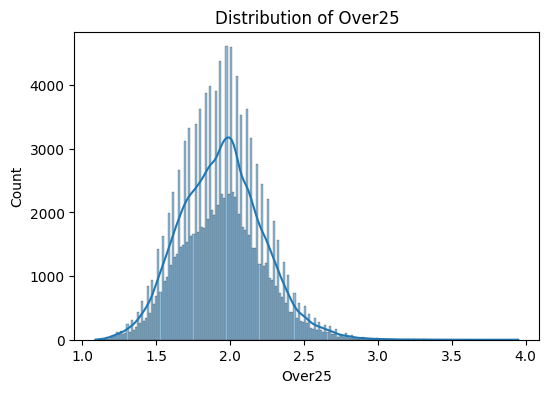

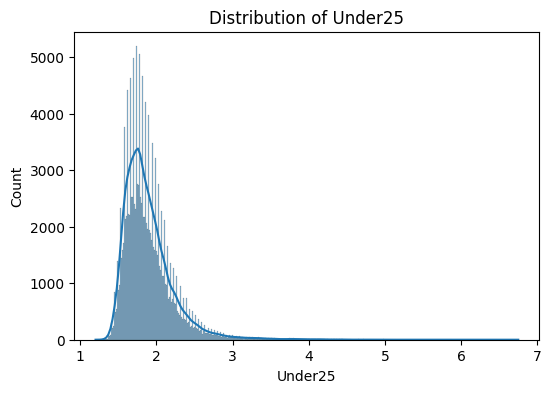

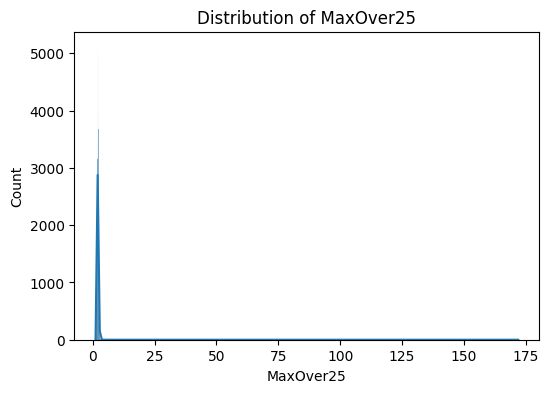

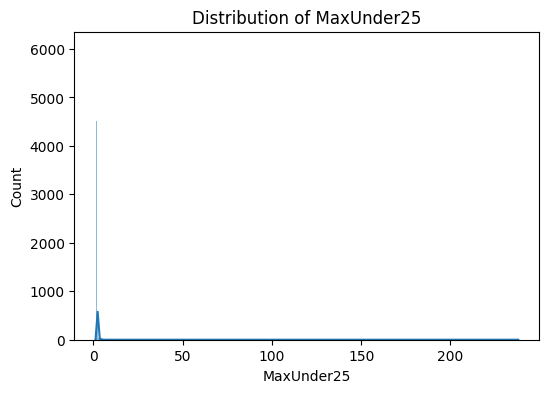

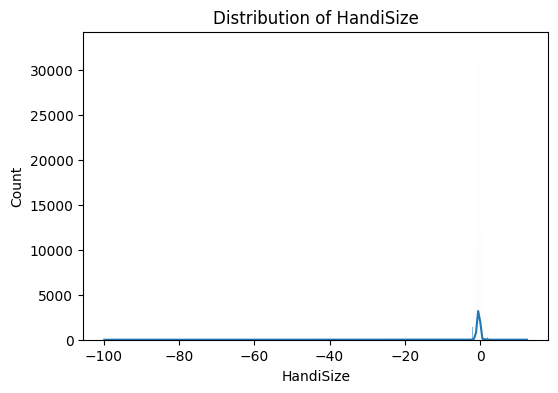

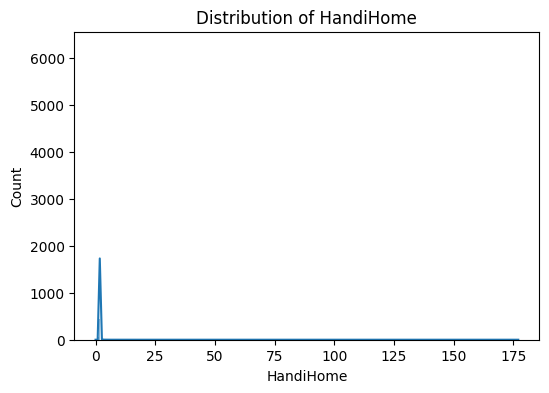

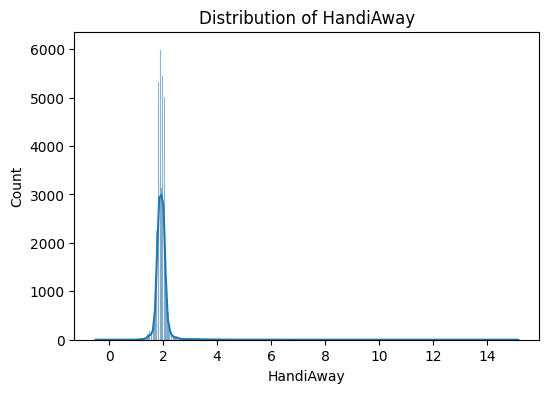

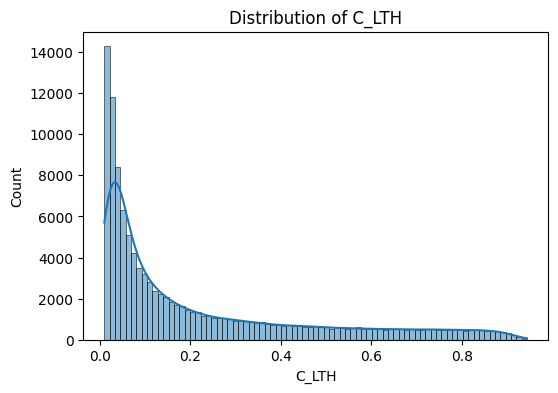

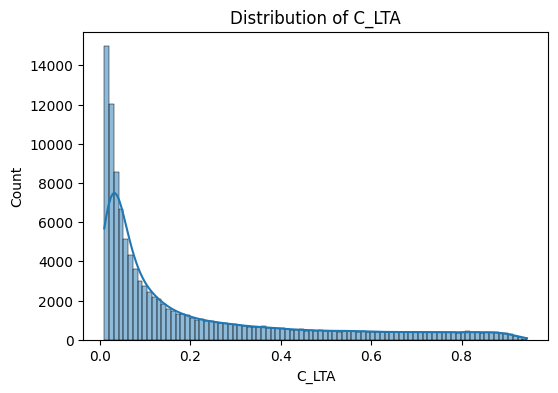

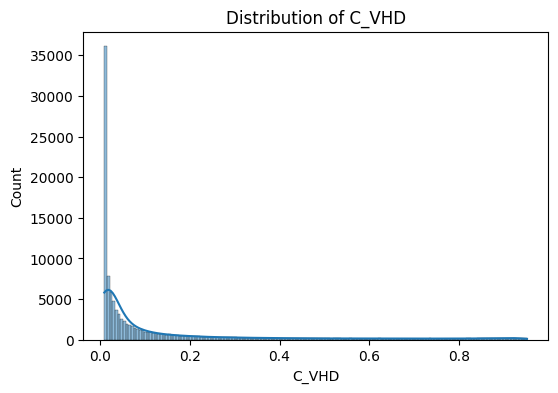

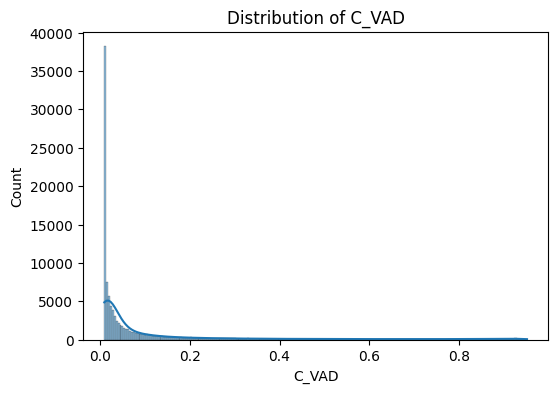

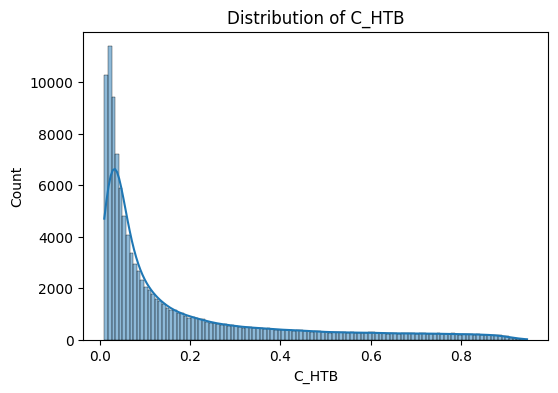

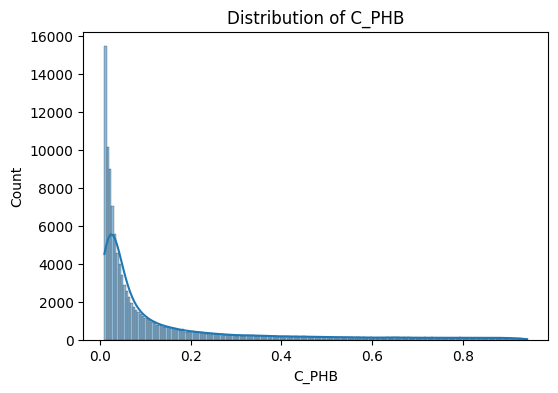

In [22]:
for col in matches.select_dtypes(include=["int64", "float64"]).columns:
  plt.figure(figsize=(6,4))
  sns.histplot(matches[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

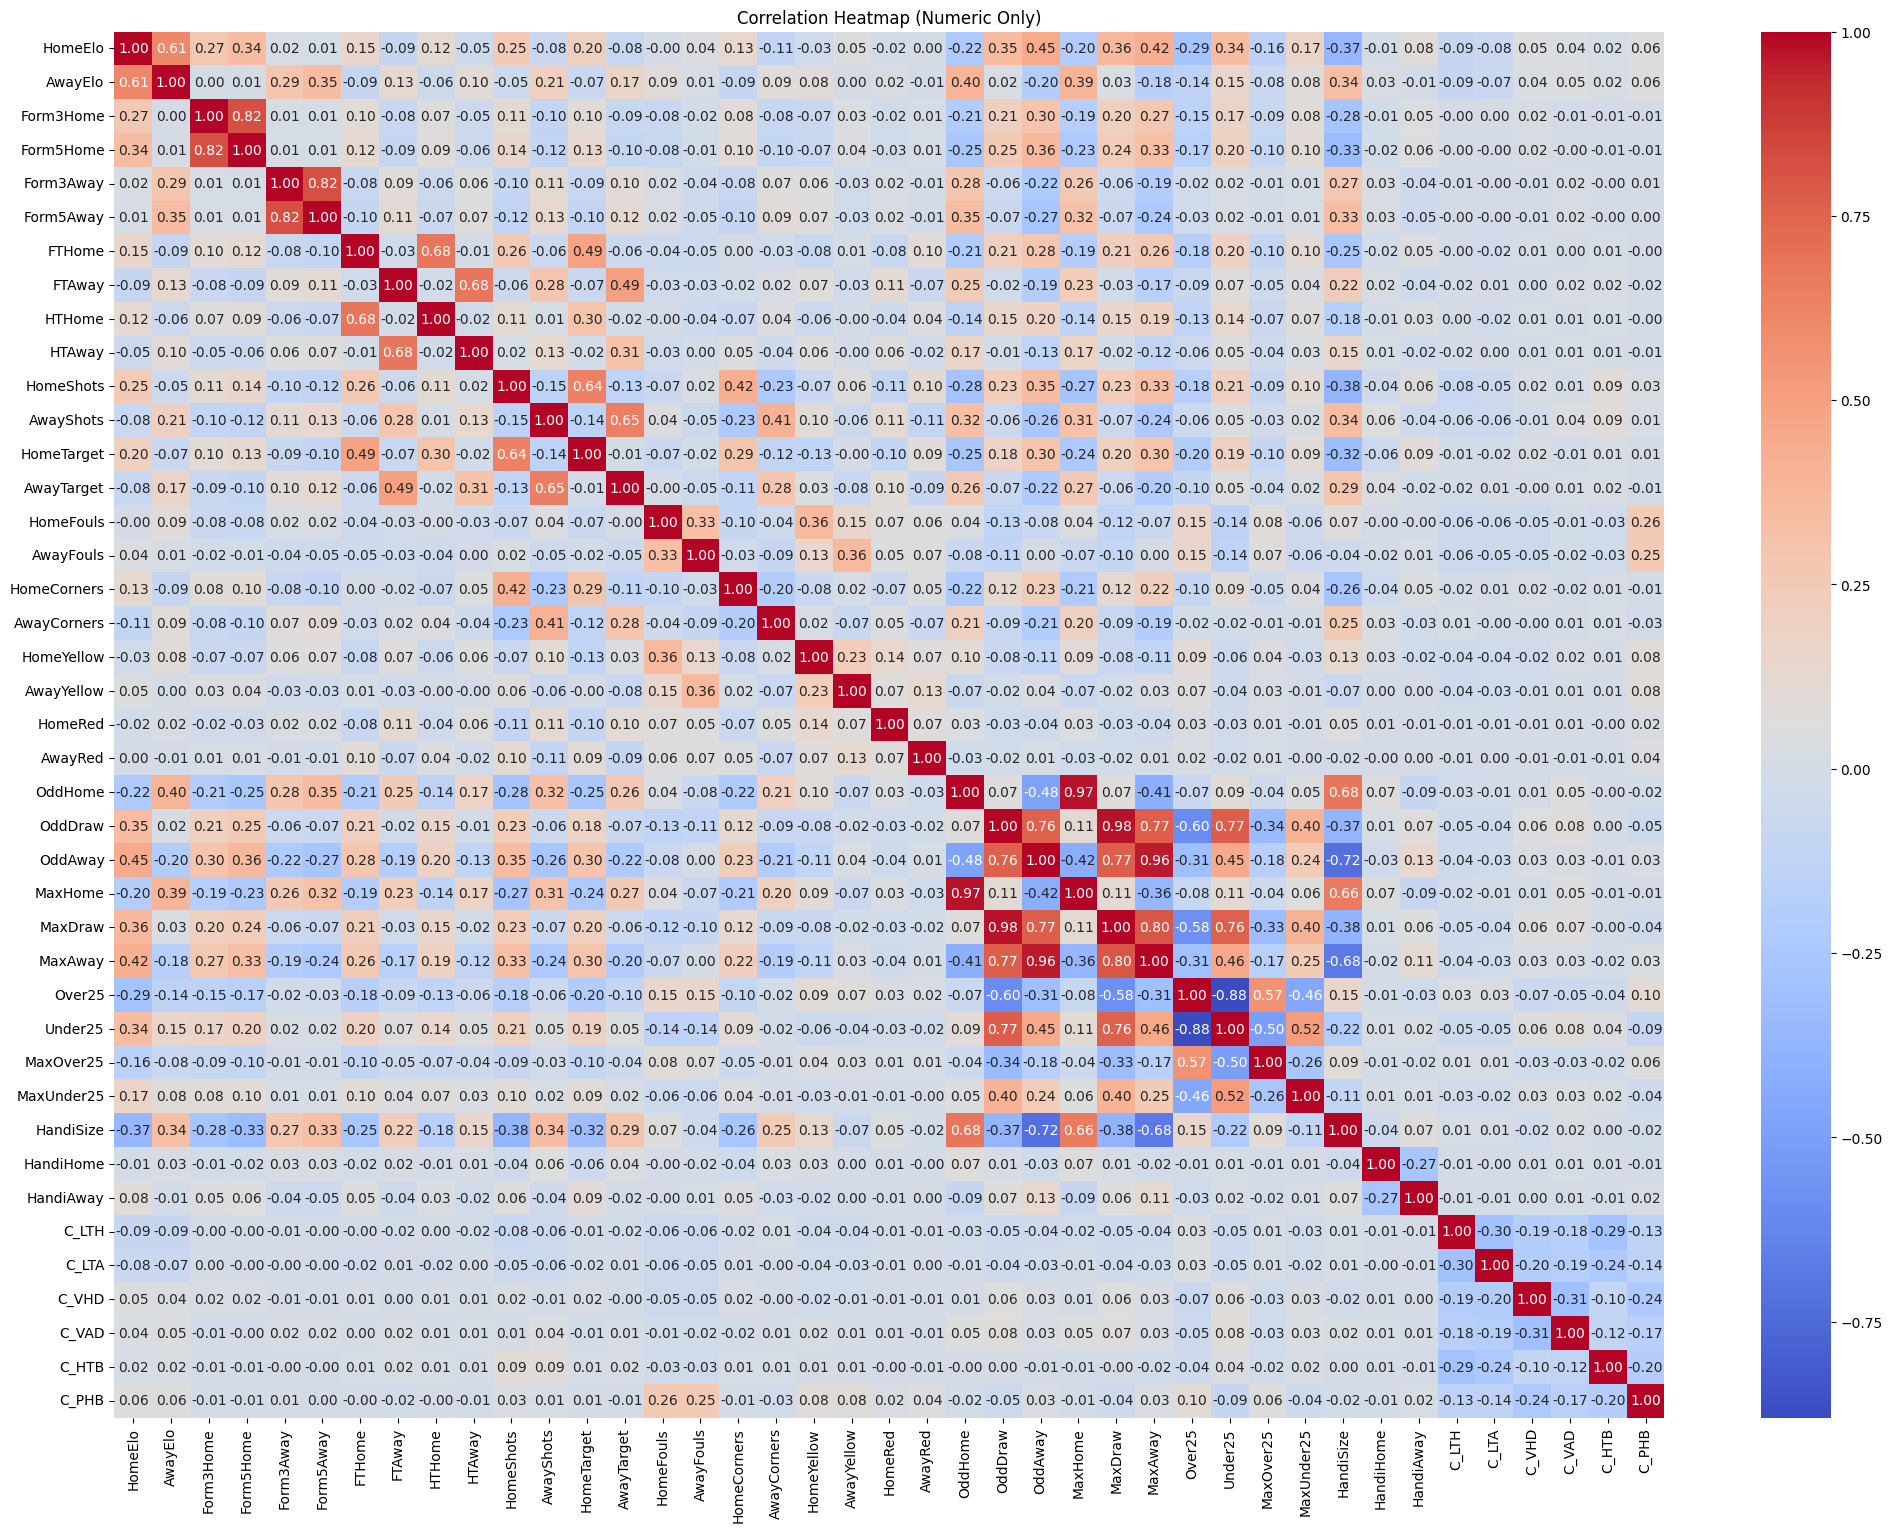

In [13]:
plt.figure(figsize=(25,18))
numeric_matches = matches.select_dtypes(include=[np.number])
sns.heatmap(numeric_matches.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()

In [7]:
# Do Premier League players have better shot accuracy?
print(matches["Division"].unique())

['F1' 'F2' 'T1' 'D1' 'D2' 'B1' 'E2' 'E1' 'N1' 'P1' 'E0' 'I2' 'SP2' 'SP1'
 'I1' 'E3' 'SC0' 'SC1' 'SC2' 'SC3' 'G1' 'EC' 'USA' 'SWE' 'NOR' 'IRL' 'BRA'
 'ARG' 'MEX' 'JAP' 'RUS' 'POL' 'DEN' 'ROM' 'AUT' 'SUI' 'FIN' 'CHN']


In [34]:
prem_leag = matches[matches["Division"] == "E0"]
prem_leag = prem_leag.dropna(subset=["HomeShots", "AwayShots"])
prem_leag = prem_leag[["Division", "HomeTeam", "AwayTeam", "HomeElo", "AwayElo", "HomeShots", "AwayShots", "HomeTarget", "AwayTarget"]]
prem_leag.head()

,Division,HomeTeam,AwayTeam,HomeElo,AwayElo,HomeShots,AwayShots,HomeTarget,AwayTarget
154,E0,Charlton,Man City,1608.77,1579.99,17.0,8.0,14.0,4.0
155,E0,Chelsea,West Ham,1800.17,1681.36,17.0,12.0,10.0,5.0
156,E0,Coventry,Middlesbrough,1635.61,1679.18,6.0,16.0,3.0,9.0
157,E0,Derby,Southampton,1636.08,1630.02,6.0,13.0,4.0,6.0
158,E0,Leeds,Everton,1782.55,1685.55,17.0,12.0,8.0,6.0


In [33]:
accuracy = matches.dropna(subset=["HomeShots", "AwayShots"])
accuracy = accuracy[["Division", "HomeTeam", "AwayTeam", "HomeElo", "AwayElo", "HomeShots", "AwayShots", "HomeTarget", "AwayTarget"]]
accuracy.head()

,Division,HomeTeam,AwayTeam,HomeElo,AwayElo,HomeShots,AwayShots,HomeTarget,AwayTarget
39,D1,Dortmund,Hansa Rostock,1646.19,1631.68,17.0,5.0,7.0,2.0
42,D1,Bayern Munich,Hertha,1867.24,1663.24,14.0,11.0,6.0,5.0
43,D1,Freiburg,Stuttgart,1618.10,1650.61,15.0,18.0,7.0,5.0
44,D1,Hamburg,Munich 1860,1716.30,1671.74,18.0,9.0,5.0,7.0
45,D1,Kaiserslautern,Bochum,1669.80,1587.32,11.0,5.0,2.0,2.0


In [17]:
# Are more goals scored during late-night matches?
print(matches["MatchTime"].unique())

[nan '03:00:00' '04:00:00' '13:00:00' '16:30:00' '17:00:00' '19:00:00'
 '19:05:00' '19:45:00' '20:00:00' '00:00:00' '00:30:00' '01:30:00'
 '02:00:00' '22:30:00' '03:30:00' '06:00:00' '10:00:00' '10:30:00'
 '11:00:00' '12:30:00' '13:30:00' '14:45:00' '15:00:00' '16:00:00'
 '17:30:00' '18:45:00' '19:30:00' '20:15:00' '23:00:00' '14:30:00'
 '18:00:00' '18:05:00' '18:30:00' '12:00:00' '06:30:00' '09:30:00'
 '21:30:00' '22:15:00' '00:20:00' '01:00:00' '12:45:00' '14:00:00'
 '15:15:00' '16:55:00' '18:10:00' '18:50:00' '20:45:00' '02:30:00'
 '21:00:00' '23:15:00' '07:00:00' '08:00:00' '00:15:00' '02:15:00'
 '21:10:00' '09:00:00' '11:30:00' '19:10:00' '21:15:00' '23:20:00'
 '23:10:00' '05:00:00' '20:10:00' '01:10:00' '11:45:00' '20:30:00'
 '22:00:00' '07:30:00' '23:30:00' '02:20:00' '01:15:00' '20:20:00'
 '05:30:00' '01:50:00' '15:45:00' '00:10:00' '00:35:00' '17:15:00'
 '18:20:00' '19:40:00' '19:15:00' '22:10:00' '15:30:00' '22:20:00'
 '17:45:00' '18:15:00' '22:50:00' '22:05:00' '01:20:00' '2

In [37]:
late_night = matches[matches["MatchTime"] >= "18:00:00"]
late_night = late_night.dropna(subset=["MatchTime", "HomeShots", "AwayShots"])
late_night = late_night[["Division", "MatchTime", "HomeTeam", "AwayTeam", "HomeElo", "AwayElo", "HomeShots", "AwayShots", "HomeTarget", "AwayTarget"]]
late_night.head()

,Division,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,HomeShots,AwayShots,HomeTarget,AwayTarget
162577,F2,19:00:00,Ajaccio,Le Havre,1360.18,1438.67,12.0,12.0,4.0,3.0
162578,F2,19:00:00,Chambly,Valenciennes,1315.69,1361.10,14.0,9.0,5.0,0.0
162579,F2,19:00:00,Clermont,Chateauroux,1414.77,1396.05,11.0,11.0,7.0,5.0
162580,F2,19:00:00,Guingamp,Grenoble,1471.61,1364.04,22.0,5.0,8.0,3.0
162581,F2,19:00:00,Nancy,Orleans,1364.51,1380.99,8.0,6.0,1.0,3.0


In [38]:
early = matches[matches["MatchTime"] < "18:00:00"]
early = early.dropna(subset=["MatchTime", "HomeShots", "AwayShots"])
early = early[["Division", "MatchTime", "HomeTeam", "AwayTeam", "HomeElo", "AwayElo", "HomeShots", "AwayShots", "HomeTarget", "AwayTarget"]]
early.head()

,Division,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,HomeShots,AwayShots,HomeTarget,AwayTarget
162599,D2,12:00:00,Dresden,Nurnberg,1437.45,1495.40,16.0,5.0,3.0,2.0
162603,F2,14:00:00,Le Mans,Lens,1315.69,1450.72,21.0,14.0,4.0,5.0
162605,D2,14:30:00,Holstein Kiel,Sandhausen,1486.85,1439.03,21.0,15.0,3.0,3.0
162606,D2,14:30:00,Osnabruck,Heidenheim,1418.09,1490.93,9.0,9.0,2.0,6.0
162618,B1,17:00:00,Cercle Brugge,Standard,1301.62,1558.00,13.0,14.0,5.0,9.0
